In [1]:
import pandas as pd

df=pd.read_csv('d:/data/creditcard/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
train_cols=df.columns[1:30]
X=df[train_cols] #독립변수
y=df['Class']

In [8]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample,y_sample=RandomUnderSampler(random_state=0).fit_sample(X,y)
X_samp=pd.DataFrame(data=X_sample,columns=train_cols)
y_samp=pd.DataFrame(data=y_sample,columns=['Class'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [9]:
df2['Class'].value_counts() #샘플링 후의 0,1 카운트

1    492
0    492
Name: Class, dtype: int64

In [11]:
#샘플링 데이터셋으로부터 독립변수,종속변수 분리
X=X_samp[train_cols]
y=y_samp['Class']

In [12]:
#학습용:검증용 8:2로 구분
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                              random_state=0)

In [17]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

787 197 787 197


[0.9086294416243654, 0.883248730964467, 0.9086294416243654, 0.9035532994923858, 0.9035532994923858, 0.883248730964467, 0.8984771573604061, 0.8934010152284264, 0.9035532994923858, 0.9035532994923858]


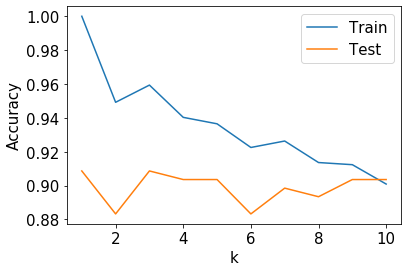

In [19]:
#최적 이웃의 갯수(k)를 구하는 과정
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
train_rate=[] #학습용 정확도를 저장할 리스트
test_rate=[] #검증용 정확도를 저장할 리스트
neighbors=range(1,11)
for n in neighbors: 
    knn=KNeighborsClassifier(n_neighbors=n) #knn 모형
    knn.fit(X_train,y_train) #기계학습
    # 학습용, 검증용 정확도 점수를 리스트에 추가
    train_rate.append(knn.score(X_train,y_train))
    test_rate.append(knn.score(X_test,y_test))
    
plt.rcParams['font.size']=15 #그래프의 사이즈 설정
plt.plot(neighbors,train_rate,label='Train') #학습용 정확도 그래프
plt.plot(neighbors,test_rate,label='Test') #검증용 정확도 그래프
plt.ylabel('Accuracy') #x축의 라벨
plt.xlabel('k') #y축의 라벨
plt.legend() #범례표시


In [23]:
#실험을 통해 얻은 최적의 k값 1로 만든 모형
model=KNeighborsClassifier(n_neighbors=1)
model.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [24]:
print('학습용:{:5.1f}%'.format(model.score(X_train,y_train)*100))
print('검증용:{:5.1f}%'.format(model.score(X_test,y_test)*100))

학습용:100.0%
검증용: 90.9%


In [26]:
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test,pred)
df_cm=pd.DataFrame(cm,index=['정상','사기'],columns=['정상','사기'])
df_cm

,정상,사기
정상,87,4
사기,14,92
